In [2]:
from modules import *

In [3]:
#원문 데이터를 입력합니다.
data = pd.read_csv('배상면주가.csv')
text_data = data.reset_index(drop=True)
text_data

,date,star,text
0,2022-11-25,5,맛있어요 전에도 사서 마셨는데 맛있습니다
1,2022-11-24,5,항상 복분자주는 여기서 사먹네요 안 독하고 깔끔합니다
2,2022-11-12,5,저번에 대형마트에서 발견해서 먹어봤다 맛있어서 온라인 구매했어요 주변에서 많이 팔면...
3,2022-11-24,5,지인한테 선물받아 먹어보니 너무 맛있어요먹어본 복분자술 중에 단연 최고에요너무 과...
4,2022-11-25,5,잘받았어요잘쓸게유
...,...,...,...
7748,2017-08-14,5,만족스럽습니다
7749,2017-07-26,5,빠른배송 맘에 들고요 가족들과 즐기기 좋습니다 시중에서 구하기 힘들었는데 좋네요
7750,2017-08-16,5,맛있네요
7751,2017-08-08,5,기대이상이에요ㅎ


In [4]:
# 제거 대상 단어
Stopwords = ['제공받아','제공받았','지원받아','지원받았','해당업체','해시태그','업체로부터',
             '체험후기','무상지급받은','무상지급','카카오톡플러스친구','톡톡하세요','네이버톡톡',
             '네이버 톡톡','무상지원','카카오톡 플러스친구','스토리링크','카카오 채널','배송'
            ]

In [5]:
# stopwords가 들어간 글은 삭제
data = data[~data['text'].str.contains('|'.join(Stopwords))]
data = data.reset_index(drop=True)
data

,date,star,text
0,2022-11-25,5,맛있어요 전에도 사서 마셨는데 맛있습니다
1,2022-11-24,5,항상 복분자주는 여기서 사먹네요 안 독하고 깔끔합니다
2,2022-11-12,5,저번에 대형마트에서 발견해서 먹어봤다 맛있어서 온라인 구매했어요 주변에서 많이 팔면...
3,2022-11-24,5,지인한테 선물받아 먹어보니 너무 맛있어요먹어본 복분자술 중에 단연 최고에요너무 과...
4,2022-11-25,5,잘받았어요잘쓸게유
...,...,...,...
6648,2017-08-18,3,나쁘지 않아요
6649,2017-08-14,5,만족스럽습니다
6650,2017-08-16,5,맛있네요
6651,2017-08-08,5,기대이상이에요ㅎ


In [6]:
ix = data['text'].str.len() > 3000
data = data.loc[~ix]
data = data.reset_index(drop=True)
data

,date,star,text
0,2022-11-25,5,맛있어요 전에도 사서 마셨는데 맛있습니다
1,2022-11-24,5,항상 복분자주는 여기서 사먹네요 안 독하고 깔끔합니다
2,2022-11-12,5,저번에 대형마트에서 발견해서 먹어봤다 맛있어서 온라인 구매했어요 주변에서 많이 팔면...
3,2022-11-24,5,지인한테 선물받아 먹어보니 너무 맛있어요먹어본 복분자술 중에 단연 최고에요너무 과...
4,2022-11-25,5,잘받았어요잘쓸게유
...,...,...,...
6648,2017-08-18,3,나쁘지 않아요
6649,2017-08-14,5,만족스럽습니다
6650,2017-08-16,5,맛있네요
6651,2017-08-08,5,기대이상이에요ㅎ


In [7]:
import re

def clean_text(texts):
    corpus = []
    for i in range(0, len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
        review = re.sub(r'\d+','', str(texts[i]))# remove number
        review = review.lower() #lower case
        review = re.sub(r'\s+', ' ', review) #remove extra space
        review = re.sub(r'<[^>]+>','',review) #remove Html tags
        review = re.sub(r'\s+', ' ', review) #remove spaces
        review = re.sub(r"^\s+", '', review) #remove space from start
        review = re.sub(r'\s+$', '', review) #remove space from the end
        corpus.append(review)
    return corpus


In [8]:
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import word_tokenize

In [9]:
!pip install konlpy
!pip install nltk

In [10]:
from konlpy.tag import Okt 
okt = Okt()

In [11]:
# 불용어 
stopwords = pd.read_csv('ko-stopwords.csv')   #한국어불용어사전 불러오기
stopwords = list(stopwords['stopwords'])
stopwords.extend(['재다','자다''빙','사서','전','저렴하다','빙 탄복','깨지다', '오다', '맛 맛','용 구매','전','빨대','처음구매','재다','깨지다 오다','맛 요', '생각 맛', '인터넷 구매','맛 맛', '두번째 구입','두번째 구매','선물용','대형','마트',
                  '빙 탄복','마시다','가져가다','저번','빠르다','좋다','안전하다','자다 오다','만족하다','좋아하다','ㅎ','않다','겠다','받다','잘쓰다','팔면','에서','고',
                  '이다','는','한','씨', "것","거","게","데","이다","건","고","되다","되어다","걸","기",
                  "시","네","듯","랍니","중이","얘","스","도도", "나","수","개","내","기","제","저","인","있다","이렇다",
                  "그렇다","번","위","팅","분","인","링","란","포","두", "진짜", "하다" ,"이다" ,"가다", "이제" ,"들다",'에서','고',
                  '이다','쓰리다 도어즈','일요일','휴무','수표','층','틀다','차차','드므','맛집','술집','길','층','개다 성','사진',
                  '파다','동영상','아스 론','자다','는','희다 스토리','한','씨', "것","거","게","데","이다","건","고","되다","되어다",
                  "걸","기", "시","네","듯","랍니","중이","얘","스","도도", "나","수","개","내","기","제","저","인","있다","이렇다", 
                  "그렇다","번","위","팅","분","인","링","란","포","두", "진짜", "하다" ,"이다" ,"가다", "이제" ,"들다", "먹다", "보다",
                  "좋다", "너무","을지로","신당", '꿀니', '복사', '이웃추가', '본문', '기타', '기능', '지도로', '보기', '더', '곳','전체',
                  '지도', '지도닫기', '공유하기', '신고하기', '위치', '사진으로', '마무리', '안녕하세요', '안녕', '술집', '맛집','끝',
                  '더보기', '지도', '데이터', '지도', '컨트롤러', '범례', '부동산', '거리', '읍', '면', '동시', '군', '구시', '도국가',
                  '랭맥','공유하기 신고하기 더보기 지도 데이터 지도 컨트롤러 범례부동산거리읍 면 동시 군 구시 도국가', '스토리', '삼발이'
                 ]) #불용어 추가

stopwords = set(stopwords)   # 중복제거

#형태소 분석 함수 만들기
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True)   # 형태소 분석, 단어는 사전형으로 바꿔주기
    words = [word for word, tag in pos_words if tag
            in ['Noun','Adjective','Verb','Adverd'] if word not in stopwords]
    return words

# Step2. 한국어 토큰화
- 한국어 토큰을 완료한 후에 bigram과 tf_idf점수를 기준으로 딕셔너리를 만들어 LDA에 적용 될 수 있게 맵핑하는 작업

In [12]:
# 형태소 분석 적용
from tqdm import tqdm
tokenizing_text = []
for i in tqdm(data['text']):
    tokenizing_text.append(okt_pos_tagging(i))
data['token'] = tokenizing_text # 새로운 tokenizing이라는 컬럼에 키워드 형태로 만든 원본     

100%|█████████████████████████████████████████████████████████████████████████████| 6653/6653 [00:17<00:00, 375.70it/s]


In [14]:
data.token

0                                              [맛있다, 맛있다]
1                           [항상, 복분자주, 사먹다, 안, 독하다, 깔끔하다]
2                    [발견, 맛있다, 온라인, 구매, 주변, 정도, 음료수, 맛있다]
3       [지인, 선물, 맛있다, 복분자, 술, 중, 단연, 최고, 스파클링, 향, 기분, ...
4                                                     [유]
                              ...                        
6648                                                [나쁘다]
6649                                              [만족스럽다]
6650                                                [맛있다]
6651                                                   []
6652                           [맛있다, 술, 엄마, 드리다, 맛있다, 요술]
Name: token, Length: 6653, dtype: object

In [ ]:
# csv로 저장
# data.to_csv("(전처리).csv", encoding = "utf-8-sig")

In [58]:
# bigram
# bigram을 적용하여 tf_idf 기준으로 토큰과 맵핑
# 데이터 프레임 형티의 tokenizing 된 단어들을 bigram 형태로 변환하기 위한 작업

texts = data['token']
bigram_result = bigram_(texts)

bigram_result

([[(0, 0.7647560059973298), (1, 0.644319991379293)],
  [(2, 0.4250608973153583),
   (3, 0.46139154274394933),
   (4, 0.46139154274394933),
   (5, 0.4250608973153583),
   (6, 0.46139154274394933)],
  [(7, 0.3906348416095743),
   (8, 0.37110399984837),
   (9, 0.3906348416095743),
   (10, 0.32385845256881984),
   (11, 0.30432761080761567),
   (12, 0.4240230361299515),
   (13, 0.4240230361299515)],
  [(14, 0.31118121423290684),
   (15, 0.3555553249211943),
   (16, 0.23662632465046177),
   (17, 0.24356753803513928),
   (18, 0.24896101201845436),
   (19, 0.2905484277574469),
   (20, 0.32755837819968053),
   (21, 0.3555553249211943),
   (22, 0.2181773703476457),
   (23, 0.32755837819968053),
   (24, 0.3555553249211943)],
  [],
  [(25, 0.5416274130773345),
   (26, 0.5416274130773345),
   (27, 0.6428681752943669)],
  [(28, 0.515301622840299),
   (29, 0.515301622840299),
   (30, 0.515301622840299),
   (31, 0.45099081198452673)],
  [(32, 0.4810978585454885),
   (33, 0.571024462561694),
   (34, 0.

# Step3. LDA 토픽 갯수 테스트

### perplexcity scotre & coherence score
- 적절한 Elbow point와 클러스터링된 원문을 보고 적절한 토픽 객수를 선정합니다
- check_topic_n 변수에 테스트해볼 토픽의 갯수를 입력
- 이때 토픽의 객수는 range를 사용해서 입력

In [59]:
# 테스트 할 토픽의 갯수 입력, range(사이 숫자 입력)

check_topic_n = range(3,11)  # 3개에서 10 개까지

## [perplexcity score]
- 군집의 복잡도를 의미 (낮을수록 좋다고 평가함)

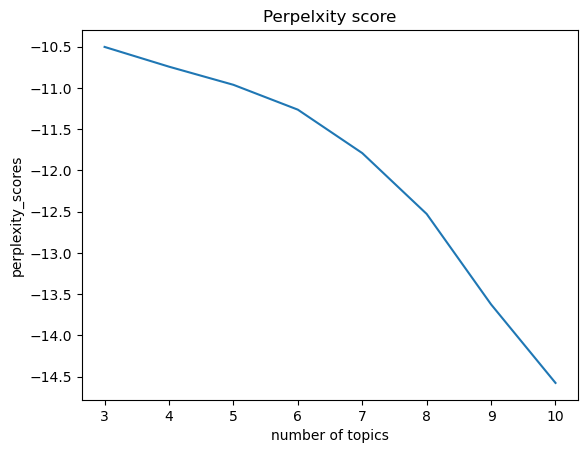

In [60]:
# 토픽의 객수에따라 달라지는 perplexcity 점수를 보여줌
# 해당 그래프는 PNG파일로 저장
# 해당 그래프를 수치로 보여주는 
perplexcity_graph(check_topic_n, bigram_result)

## [coherence score]
- 군집의 일관성을 의미(높을수록 좋다고 평가함)
- perplexcity와 coherence score가 완벽한 정답은 아니기 때문에 결과를 보고 추가 판단을 할 필요가 있음

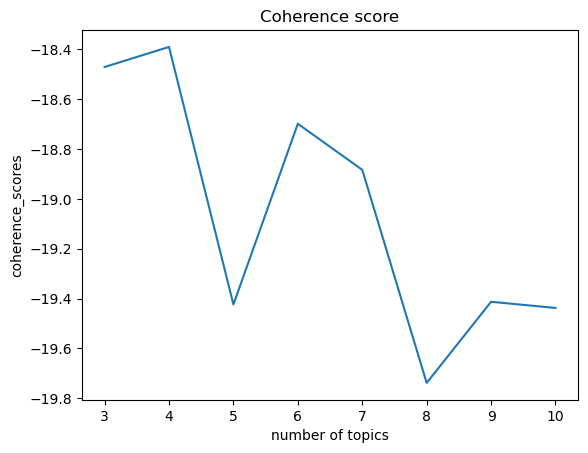

In [61]:
# 토픽의 객수에따라 달라지는 coherence 점수를 보여줌
# 해당 그래프는 PNG파일로 저장
# 해당 그래프를 수치로 보여주는 
coherence_graph(check_topic_n, bigram_result)

# Step4. LDA 시각화 라이브러리 확인
- pyLDAvis 라이브러리를 활용해 LDA를 시각화 합니다.
- 해당 라이브러리가 잘 작동하는지 확인하고 토픽별 할당도니 document를 확인합니다.

In [62]:
!pip3 install pyldavis

In [63]:
import pyLDAvis

import pyLDAvis.gensim_models as gensimvis

## 4.2 라이브러리 테스트 
- 아래셀은 pyLDA퍈 라이브러리 테스트코드로, lda시각화가 잘 실행되는지 확인합니다.
- 해당 코드에서 오류나면 라이브러리가 제대로 설치 되었는지 확인 필요
- 오류가 발생하지 않는담녀 아래 셀은 더이상 실행하지 않아도 좋습니다

In [64]:
model = LdaModel(bigram_result[0], num_topics=5, id2word=bigram_result[2])
visual = gensimvis.prepare(model, bigram_result[1], bigram_result[2])
pyLDAvis.display(visual)

# Step 5. LDA 시각화 및 저장
- cheack_topic_n 에서 설정했던 토픽의 갯수별로 시각화된 LDA가 저장
- 저장된 파일은 html 확장자를 갖음
- 만약 topic 개수를 새로 저장하고 싶다면cheack_topic_n  대신 range(n.m)을 넣어주세요
- 시각화 파일과 함께 대조하여 언무을 확인 할 수 있도록 토픽 개수에 따른 원문도 저장됩니다

## 5.1 토픽 할당 할당된 document 추출(원문 검토시 활용)

- document 별로 해당하는 document가 몇 번 토픽에 할당되었는지를  보여줌
- topic_weight 컬럼은 topic 컬럼에서의 해당 토픽을 확률을 나타냅니다.
- topic_all_weight 컬럼은 설정한 모든 토픽에 대하여 해당  document가 각 토픽에 할당될 확률을 나타냄

In [66]:
for i in tqdm(check_topic_n):
    # lda 시각화된 결과 저장
    model = LdaModel(bigram_result[0], num_topics=i, id2word=bigram_result[2])
    visual = gensimvis.prepare(model, bigram_result[1], bigram_result[2])
    pyLDAvis.save_html(visual, '배상면주가_LDA토픽추출_시각화_topic_n{}.html'.format(i))
    # 저장할 파일 이름 넣어주세용
    
    
    # lda 데이터 프레임 저장(원문, 토픽 넘버 매칭)
    lda_result = exctract_topic(model, bigram_result[1])
    df = pd.concat([text_data, lda_result], axis=1)
    df.to_csv('배상면주가_LDA토픽추출_원문_topic_n{}.csv'.format(i), encoding='utf-8-sig')
    # 저장할 파일 이름 넣어주세요


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:16<00:00,  2.02s/it]
